In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation


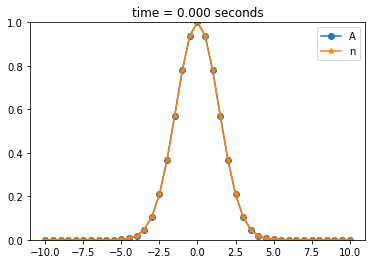

In [4]:
def u0(x):
    return np.exp(-x * x / 4)

mu = 1.0
T = 2.0
L, R = -10.0, 10.0
n = 40
m = 40
h = (R - L) / n
tau = T / m
x = np.linspace(L, R, n + 1)
t = np.linspace(0.0, T, m + 1)
y = np.zeros((m + 1, n + 1))
d = mu * tau / (h * h)
y[0] = np.vectorize(u0)(x)
for k in range(m):
    for i in range(1, n):
        y[k + 1][i] = y[k][i] + d * (y[k][i - 1] - 2 * y[k][i] + y[k][i + 1])

def solution(x, t):
    return 1 / np.sqrt(t + 1) * np.exp(-x * x / 4 / (t + 1))

vsolution = np.vectorize(solution, excluded = ['t'])
u = np.zeros((m + 1, n + 1))
for k in range(m):
    u[k] = vsolution(x, tau * k)

def animate(k):
    plt.clf()
    plt.ylim(0, 1)
    plt.title(f"time = {(tau * k):0.3f} seconds")
    plt.plot(x, y[k], marker = 'o')
    plt.legend("Numerical")
    plt.plot(x, u[k], marker = '*')
    plt.legend("Analytical")

ani = animation.FuncAnimation(plt.figure(0), animate, frames = y.shape[0], interval = 100)
ani.save('termal_conductivity.mp4')
plt.show()